In [1]:
"""
Sipei Chen
Kearsten Collins
Jesse Hankins
Vincent Kovich
Britani Prescott
Jesse Raines
Liu Yu
"""

import math

def is_pronoun(word, list_of_pronouns):
    return word.lower() in list_of_pronouns

def is_female(pronoun, she_list):
    return pronoun.lower() in she_list

def is_male(pronoun, he_list):
    return pronoun.lower() in he_list

def pronoun_type_counts(text, list_of_pronouns, he_list, she_list):
    pronoun_total_count = 0
    male_count = 0
    female_count = 0
    neither_count = 0
    with open(text) as text_file:
        for line in text_file:
            for word in line.split():
                if is_pronoun(word, list_of_pronouns):
                    pronoun_total_count += 1
                    pronoun = word
                    if is_male(pronoun, he_list):
                        male_count += 1
                    elif is_female(pronoun, she_list):
                        female_count += 1
                    else:
                        neither_count += 1
    return [pronoun_total_count, male_count, female_count, neither_count]

def get_counts_and_probabilities(text, list_of_pronouns, he_list, she_list):
    pronoun_counts = pronoun_type_counts(text, list_of_pronouns, he_list, she_list)
    pronoun_total_count = pronoun_counts[0]
    male_count = pronoun_counts[1]
    female_count = pronoun_counts[2]
    neither_count = pronoun_counts[3]
    male_probability = male_count / pronoun_total_count
    female_probability = female_count / pronoun_total_count
    neither_probability = neither_count / pronoun_total_count
    return [pronoun_total_count, male_count, female_count, neither_count, male_probability, female_probability, neither_probability]

def inner_sum_for_type(type_count, type_probability):
    inner_sum = type_count * math.log(type_probability, 10)
    return inner_sum

def calculate_logloss(text, list_of_pronouns, he_list, she_list):
    counts_and_probabilities = get_counts_and_probabilities(text, list_of_pronouns, he_list, she_list)
    pronoun_total_count = counts_and_probabilities[0]
    male_count = counts_and_probabilities[1]
    female_count = counts_and_probabilities[2]
    neither_count = counts_and_probabilities[3]
    male_probability = counts_and_probabilities[4]
    female_probability = counts_and_probabilities[5]
    neither_probability = counts_and_probabilities[6]
    total_sum = 0
    total_sum += inner_sum_for_type(male_count, male_probability)
    total_sum += inner_sum_for_type(female_count, female_probability)
    total_sum += inner_sum_for_type(neither_count, neither_probability)
    logloss = (-1 / pronoun_total_count) * total_sum
    return [logloss, pronoun_total_count, male_count, female_count, neither_count, male_probability, female_probability, neither_probability]
    

In [2]:
import pandas as pd

df_pronoun_classification = pd.ExcelFile('pronouns.xlsx').parse('Sheet1')
df_pronoun_classification['Pronoun'] = df_pronoun_classification['Pronoun'].str.lower()

# 0 - neither, 1 - male, 2 - female
df_pronoun_classification = df_pronoun_classification.rename(columns = {df_pronoun_classification.columns[1]: "Classification"})

list_of_all_pronouns = df_pronoun_classification['Pronoun'].tolist()
list_of_corresponding_categories = df_pronoun_classification['Classification'].tolist()

male_pronouns = []
female_pronouns = []
neither_pronouns = []

for i in range(len(list_of_all_pronouns)):
    if list_of_corresponding_categories[i] == 0:
        neither_pronouns.append(list_of_all_pronouns[i])
    elif list_of_corresponding_categories[i] == 1:
        male_pronouns.append(list_of_all_pronouns[i])
    else:
        female_pronouns.append(list_of_all_pronouns[i])


In [3]:
print("Pride and Prejudice Data:")

logloss_pride_and_prejudice = calculate_logloss('prideandprejudice.txt', list_of_all_pronouns, male_pronouns, female_pronouns)

print("total pronouns: ", logloss_pride_and_prejudice[1])
male_count = logloss_pride_and_prejudice[2]
male_count_pr = male_count
print("male count: ", male_count)
female_count = logloss_pride_and_prejudice[3]
female_count_pr = female_count
print("female count: ", female_count)
neither_count = logloss_pride_and_prejudice[4]
neither_count_pr = neither_count
print("neither count: ", neither_count)

male_probability = logloss_pride_and_prejudice[5]
print("P(male pronoun): ", male_probability)
female_probability = logloss_pride_and_prejudice[6]
print("P(female pronoun): ", female_probability)
neither_probability = logloss_pride_and_prejudice[7]
print("P(neither): ", neither_probability)

logloss = logloss_pride_and_prejudice[0]
print("logloss: ", logloss)

Pride and Prejudice Data:
total pronouns:  21687
male count:  3054
female count:  3680
neither count:  14953
P(male pronoun):  0.14082169041361184
P(female pronoun):  0.16968690920828147
P(neither):  0.6894914003781067
logloss:  0.3619373516177178


In [4]:
import matplotlib.pyplot as plt

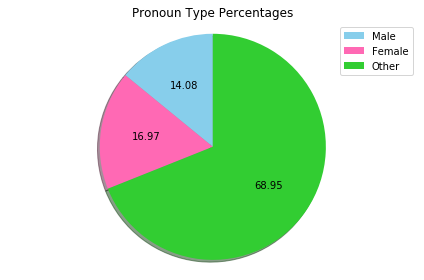

In [5]:
labels = ['Male', 'Female', 'Other']
counts = [male_count, female_count, neither_count]
plt.title('Pronoun Type Percentages')
colors = ['skyblue', 'hotpink', 'limegreen']
plt.pie(counts, colors = colors, autopct = '%.2f', shadow = True, startangle = 90)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show();

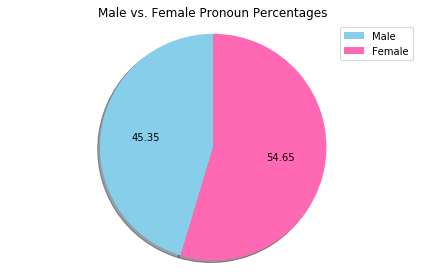

In [6]:
labels = ['Male', 'Female']
counts = [male_count, female_count]
colors = ['skyblue', 'hotpink']
plt.title('Male vs. Female Pronoun Percentages')
plt.pie(counts, colors = colors, autopct = '%.2f', shadow = True, startangle = 90)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show();

In [7]:
print("2000 Leagues Data:")

logloss_2000_leagues = calculate_logloss('20KLeagues.txt', list_of_all_pronouns, male_pronouns, female_pronouns)

print("total pronouns: ", logloss_2000_leagues[1])
male_count = logloss_2000_leagues[2]
male_count_2000 = male_count
print("male count: ", male_count)
female_count = logloss_2000_leagues[3]
female_count_2000 = female_count
print("female count: ", female_count)
neither_count = logloss_2000_leagues[4]
neither_count_2000 = neither_count
print("neither count: ", neither_count)

male_probability = logloss_2000_leagues[5]
print("P(male pronoun): ", male_probability)
female_probability = logloss_2000_leagues[6]
print("P(female pronoun): ", female_probability)
neither_probability = logloss_2000_leagues[7]
print("P(neither): ", neither_probability)

logloss = logloss_2000_leagues[0]
print("logloss: ", logloss)

2000 Leagues Data:
total pronouns:  13571
male count:  1176
female count:  117
neither count:  12278
P(male pronoun):  0.08665536806425467
P(female pronoun):  0.008621324883943704
P(neither):  0.9047233070518016
logloss:  0.14918500018255662


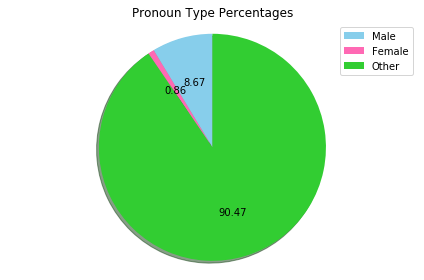

In [8]:
labels = ['Male', 'Female', 'Other']
counts = [male_count, female_count, neither_count]
plt.title('Pronoun Type Percentages')
colors = ['skyblue', 'hotpink', 'limegreen']
plt.pie(counts, colors = colors, autopct = '%.2f', shadow = True, startangle = 90)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show();

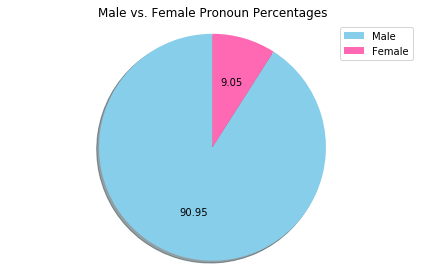

In [9]:
labels = ['Male', 'Female']
counts = [male_count, female_count]
colors = ['skyblue', 'hotpink']
plt.title('Male vs. Female Pronoun Percentages')
plt.pie(counts, colors = colors, autopct = '%.2f', shadow = True, startangle = 90)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show();

In [10]:
male_count = male_count_pr + male_count_2000
female_count = female_count_pr + female_count_2000
neither_count = neither_count_pr + neither_count_2000

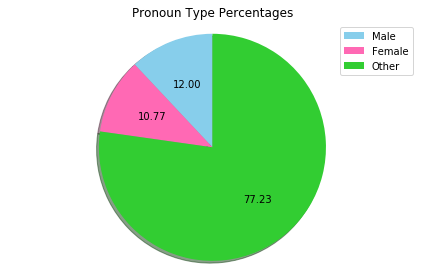

In [11]:
labels = ['Male', 'Female', 'Other']
counts = [male_count, female_count, neither_count]
plt.title('Pronoun Type Percentages')
colors = ['skyblue', 'hotpink', 'limegreen']
plt.pie(counts, colors = colors, autopct = '%.2f', shadow = True, startangle = 90)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show();

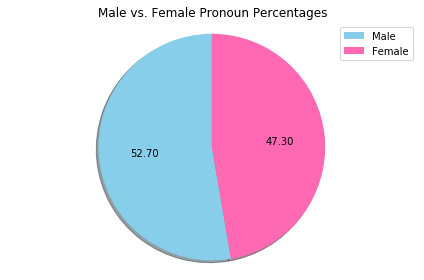

In [12]:
labels = ['Male', 'Female']
counts = [male_count, female_count]
colors = ['skyblue', 'hotpink']
plt.title('Male vs. Female Pronoun Percentages')
plt.pie(counts, colors = colors, autopct = '%.2f', shadow = True, startangle = 90)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show();